/tmp/ipykernel_6167/1588004942.py:31: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, df.radius.max())


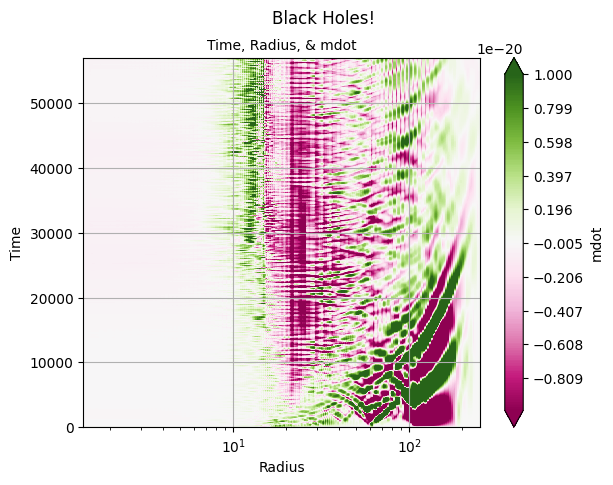

/tmp/ipykernel_6167/1588004942.py:31: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, df.radius.max())


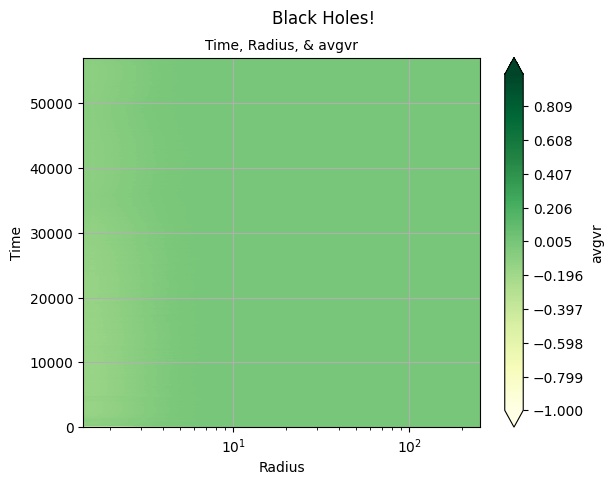

/tmp/ipykernel_6167/1588004942.py:31: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, df.radius.max())


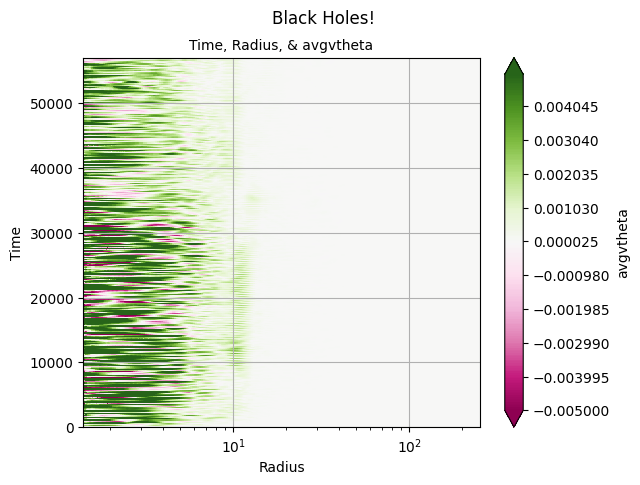

/tmp/ipykernel_6167/1588004942.py:31: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, df.radius.max())


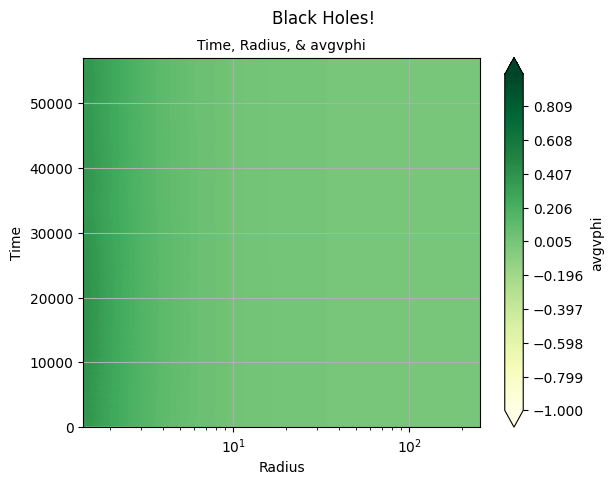

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfftfreq, rfft
import pandas as pd

mdotdf = pd.read_csv('Mdot', sep = '\t', header=None, names = ['time', 'radius', 'mdot'])
avgvrdf = pd.read_csv('AvgVr', sep = '\t', header=None, names = ['time', 'radius', 'avgvr'])
avgvtheta = pd.read_csv('AvgVtheta', sep = '\t', header=None, names = ['time', 'radius', 'avgvtheta'])
avgvphi = pd.read_csv('AvgVphi', sep = '\t', header=None, names = ['time', 'radius', 'avgvphi'])

#extend = 'both', levels = np.arange(-4, 4, 200)

def plot_color_map(df, variable, binmin, binmax, cmap):
  plt.figure()
  xd_data = []
  for radius in df.radius.unique():
    df_new = df.loc[df['radius'] == radius]
    var_array = np.array(df_new[f'{variable}'])
    xd_data.append(var_array)
  xd_df = pd.DataFrame(xd_data)
  xd_df = xd_df.transpose()
  time_df = df.time.unique()
  radius_df = df.radius.unique()
  plt.contourf(radius_df, time_df, xd_df, cmap = cmap, extend = 'both', levels =np.linspace(binmin, binmax, 200))
  plt.colorbar(label = f'{variable}')
  plt.title(f'Time, Radius, & {variable}', fontsize = 10)
  plt.suptitle('Black Holes!')
  plt.xlabel('Radius')
  plt.ylabel('Time')
  plt.xscale('log')
  plt.xlim(0, df.radius.max())
  plt.grid()
  plt.show()



dfs = [mdotdf, avgvrdf, avgvtheta, avgvphi]
variables = ['mdot', 'avgvr', 'avgvtheta', 'avgvphi']
cmap = ['PiYG', 'YlGn', 'PiYG', 'YlGn']
binmini = [-1e-20, -1,-0.005,-1]
binmaxi = [1e-20,1,0.005,1]
for df, var, min, max, map in zip(dfs, variables, binmini, binmaxi, cmap):
  plot_color_map(df, var, min,max, map)